In [108]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# import libraries to plot time series
from datetime import datetime
import matplotlib.dates as mdates
from scipy.ndimage.filters import gaussian_filter1d

calendarData = pd.read_csv('calendar.csv')

In [109]:
def timeplot(data, feat, title):
    
    plt.figure(figsize=(18,8))
    
    x = [datetime.strptime(date, '%Y-%m-%d') for date in data.index]
    y = data[feat]
    
    y_smooth = gaussian_filter1d(y, sigma=5)
    
    # set x tick by month
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    
    plt.title(title)
    plt.plot(x, y_smooth, 'c-')
    plt.show()

In [110]:
calendarData['available'].value_counts()

t    934542
f    459028
Name: available, dtype: int64

In [111]:
# convert 'available' into binary (Replacing the T with 1 and F with 2) changing into numeric so system is able to read.
calendarData['available'] = calendarData['available'].map(lambda available: 1 if available == 't' else 0)

In [112]:
# check
calendarData['available'].value_counts()

1    934542
0    459028
Name: available, dtype: int64

In [113]:
occupancy = calendarData[['date', 'available']].groupby('date').mean()
occupancy['occupancy'] = 1 - occupancy['available']

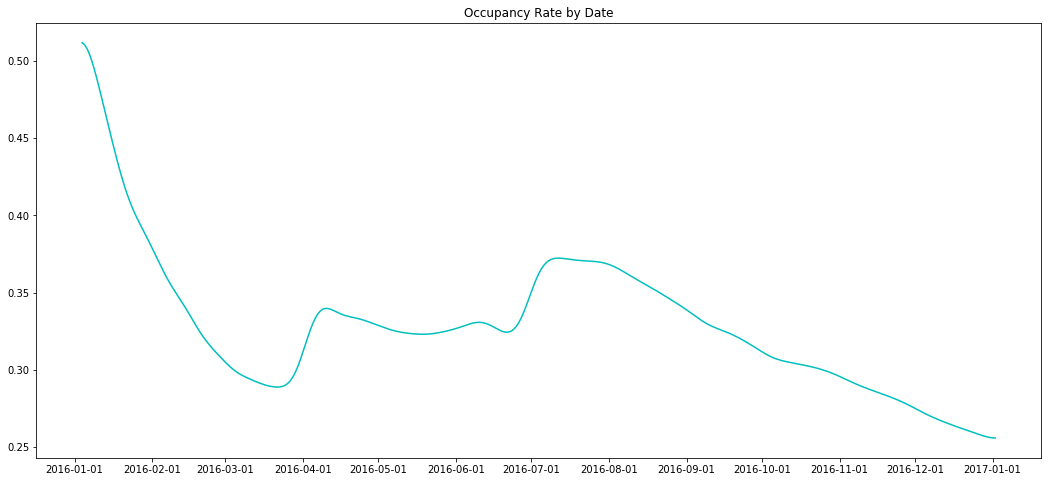

Jan 2016 has the highest number of occupancy rate and the lowest being Jan 2017. Spring and summer is also a popular time for 
Seattle as we can see the month experiencing a spike 
Winter period also recorded a low occupancy rate.


In [114]:
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')


print("Jan 2016 has the highest number of occupancy rate and the lowest being Jan 2017. Spring and summer is also a popular time for \nSeattle as we can see the month experiencing a spike \nWinter period also recorded a low occupancy rate.")

In [115]:
# making 'price' datatype as float
calendarData['price'] = calendarData['price'].map(lambda price: float(price[1:].replace(',', '')), na_action='ignore')

In [116]:
pri_median = calendarData[['date', 'price']].groupby('date').median()

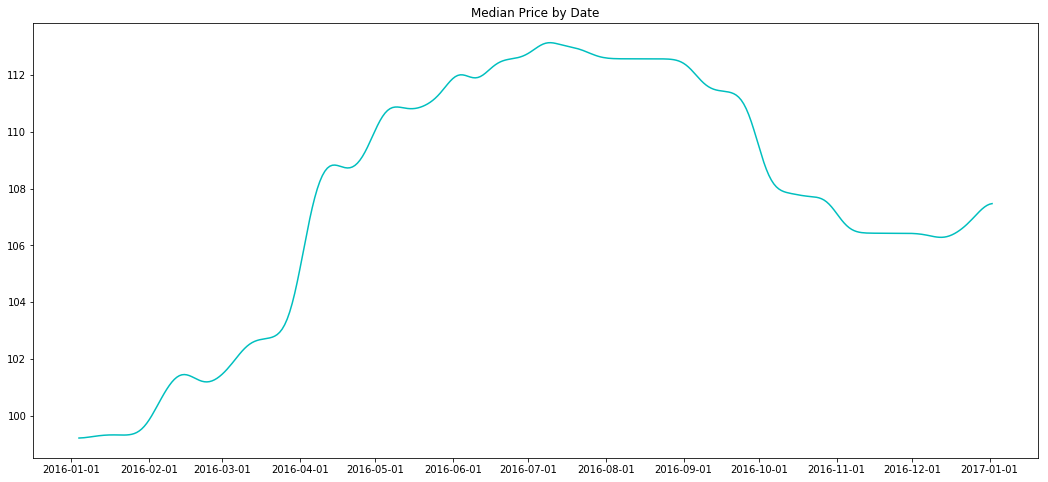

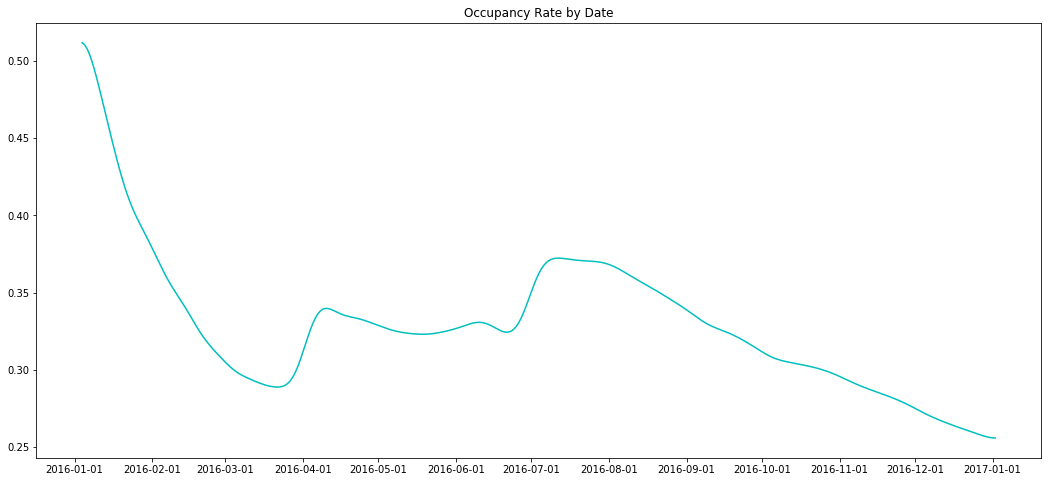

There is a correlation between the price and the occupancy rate. Putting graph side by side, we can see that it is only when 
the occupancy rate is peaking the median price of the rental also increased.


In [117]:
timeplot(pri_median, 'price', 'Median Price by Date')
timeplot(occupancy, 'occupancy', 'Occupancy Rate by Date')

print("There is a correlation between the price and the occupancy rate. Putting graph side by side, we can see that it is only when \nthe occupancy rate is peaking the median price of the rental also increased.")